# Module 3 Homework - Working with complicated data to explore relationships

Created by Jimmy Valdez (017352270)  
Last updated: 10/4/2025

#### Question 1: ####

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [49]:
import pandas as pd
import urllib.request
from io import StringIO

url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"

with urllib.request.urlopen(url) as f:
    lines = [line.decode("utf-8").strip() for line in f]

fields_line = next(line for line in lines if "# Fields:" in line)
fields = fields_line.replace("# Fields: ", "").strip('"').split(", ")

data_lines = [line for line in lines if not line.startswith("#")]

cleaned_data_lines = []
for line in data_lines:
    cleaned_line = line.rstrip(',')
    cleaned_data_lines.append(cleaned_line)

csv_data = StringIO("\n".join(cleaned_data_lines))

df = pd.read_csv(csv_data, header=None, names=fields)
df = df.drop(columns=["query acc.ver"])
df = df.set_index("subject acc.ver")
df.columns = df.columns.str.strip().str.replace('"', '').str.replace(",", "")

print(df.head())

                 % identity  alignment length  mismatches  gap opens  \
subject acc.ver                                                        
NaN                     NaN               NaN         NaN        NaN   
NP_904328.1         100.000             318.0         0.0        0.0   
AGK29621.1           99.686             318.0         1.0        0.0   
YP_220563.1          99.686             318.0         1.0        0.0   
ACM24502.1           99.686             318.0         1.0        0.0   

                 q. start  q. end  s. start  s. end  evalue  bit score  \
subject acc.ver                                                          
NaN                   NaN     NaN       NaN     NaN     NaN        NaN   
NP_904328.1           1.0   318.0       1.0   318.0     0.0      629.0   
AGK29621.1            1.0   318.0       1.0   318.0     0.0      629.0   
YP_220563.1           1.0   318.0       1.0   318.0     0.0      627.0   
ACM24502.1            1.0   318.0       1.0   318.0

#### Question 2: ####
What is the average number of publications?

In [50]:
df["publications"] = pd.to_numeric(df["publications"], errors="coerce")

avg_publications = df["publications"].mean()
print(f"Average number of publications: {avg_publications:.2f}")


Average number of publications: 26.99


#### Question 3: ####
List the `subject acc.ver` that has over 15,000 bonds.

In [42]:
df["bonds"] = pd.to_numeric(df["bonds"].astype(str).str.replace(",", ""), errors='coerce')

result = df[df["bonds"] > 15000]

print(result.index.tolist())

['AGK29621.1', 'AHG32084.1', '6G2J_H', 'YP_002791042.1', 'AGK29634.1', '0806162F', 'YP_009112408.1', 'YP_001876469.1', 'YP_009092269.1', 'AHG32149.1', 'YP_009092074.1', 'YP_009450474.1', 'YP_004123270.1', 'YP_009092073.1', 'AHZ60901.1', 'YP_004123350.1', 'YP_009453754.1', 'ADD46492.1', 'YP_007025968.1', 'YP_009453806.1', 'YP_007024956.1', 'ASM92364.1', 'YP_006073044.1', 'ASM92494.1', 'ADG95699.1', 'YP_004891275.1', 'YP_009166014.1', 'YP_009538416.1', 'YP_009414182.1', 'YP_009178854.1', 'YP_009414415.1', 'YP_009353908.1', 'YP_009093743.1', 'ABX45285.1', 'YP_009414156.1', 'YP_009414363.1']


#### Question 4: ####
Create a scatter plot that shows the relationship between `% identity` and `alignment length`.  
Include in your answer, do alignment with longer length have higher % identity?

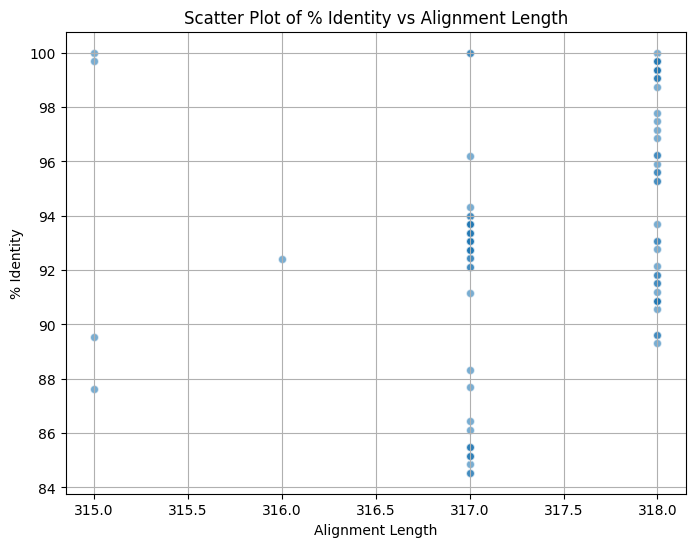

In [51]:
import matplotlib.pyplot as plt

df['% identity'] = pd.to_numeric(df['% identity'], errors='coerce')
df['alignment length'] = pd.to_numeric(df['alignment length'], errors='coerce')

df_plot = df.dropna(subset=['% identity', 'alignment length'])

plt.figure(figsize=(8,6))
plt.scatter(df_plot['alignment length'], df_plot['% identity'], alpha=0.6, edgecolors='w')

plt.title("Scatter Plot of % Identity vs Alignment Length")
plt.xlabel("Alignment Length")
plt.ylabel("% Identity")
plt.grid(True)
plt.show()

From this scatter plot we can see that alignment with longer length on average has a higher % identity.

#### Question 5: ####
Create a plot that shows the correlation between `% identity` and `% positives`.  
Include in your answer and interpretation of what this plot tells you about %identity and %positive.

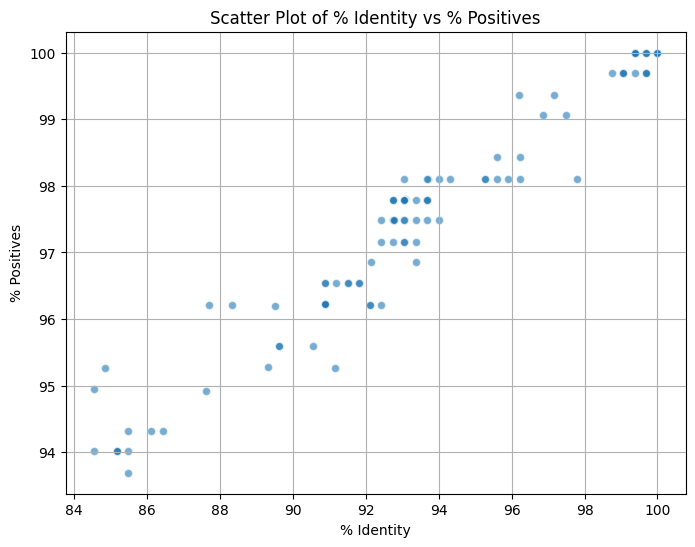

In [52]:
import matplotlib.pyplot as plt

df['% identity'] = pd.to_numeric(df['% identity'], errors='coerce')
df['% positives'] = pd.to_numeric(df['% positives'], errors='coerce')

df_corr = df.dropna(subset=['% identity', '% positives'])

plt.figure(figsize=(8,6))
plt.scatter(df_corr['% identity'], df_corr['% positives'], alpha=0.6, edgecolors='w')
plt.title("Scatter Plot of % Identity vs % Positives")
plt.xlabel("% Identity")
plt.ylabel("% Positives")
plt.grid(True)
plt.show()

From this scatter plot we can see that as % identity increases, % positives also increases.

#### Question 6: ####
Create a histogram to plot the frequency distribution of `%identity`.

Ask: Are most hits high identity (close to 100%) or spread out?
Include in your answer, are most of the subject acc.ver  `%identity` close to 100% or spread out?

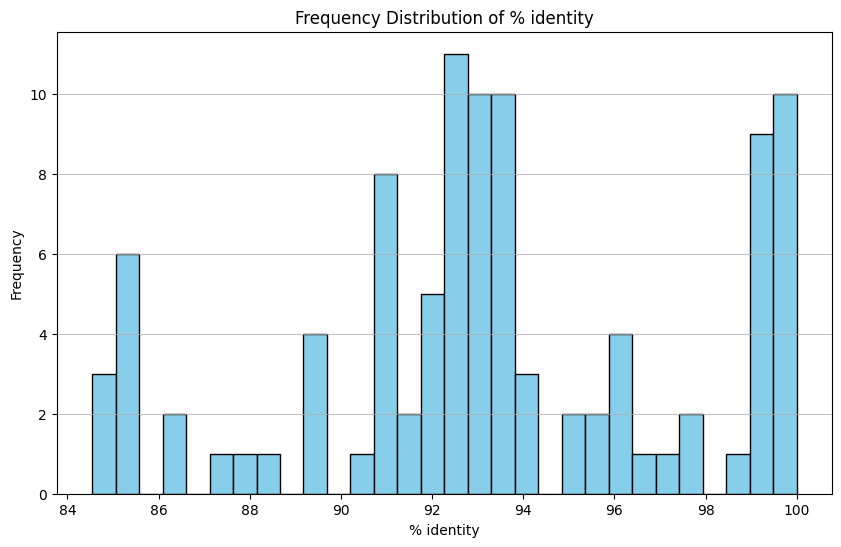

In [53]:
import matplotlib.pyplot as plt

df_clean = df.dropna(subset=['% identity'])

plt.figure(figsize=(10,6))
plt.hist(df_clean['% identity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of % identity')
plt.xlabel('% identity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

From this histogram we can see that there are two dominant peaks where the frequency of hits are very high, that being around 92-94% and 98-100%. Other than that the hits seem to be lean more towards the % identitu being  over 90%

#### Question 7: ####
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [57]:
url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv"
protein_df = pd.read_csv(url)

df_reset = df.reset_index()

df_merged = df_reset.merge(
    protein_df,
    how="left",
    left_on="subject acc.ver",
    right_on="Protein"
)

df_merged = df_merged.drop(columns=["Protein"]).rename(columns={"Source": "Protein source"})

df_merged = df_merged.set_index("subject acc.ver")

df_merged["Protein source"] = df_merged["Protein source"].fillna("NA")

df_merged = df_merged.drop(columns=["Unnamed: 0"])
print(df_merged.head())

                 % identity  alignment length  mismatches  gap opens  \
subject acc.ver                                                        
NaN                     NaN               NaN         NaN        NaN   
NP_904328.1         100.000             318.0         0.0        0.0   
AGK29621.1           99.686             318.0         1.0        0.0   
YP_220563.1          99.686             318.0         1.0        0.0   
ACM24502.1           99.686             318.0         1.0        0.0   

                 q. start  q. end  s. start  s. end  evalue  bit score  \
subject acc.ver                                                          
NaN                   NaN     NaN       NaN     NaN     NaN        NaN   
NP_904328.1           1.0   318.0       1.0   318.0     0.0      629.0   
AGK29621.1            1.0   318.0       1.0   318.0     0.0      629.0   
YP_220563.1           1.0   318.0       1.0   318.0     0.0      627.0   
ACM24502.1            1.0   318.0       1.0   318.0